In [112]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [113]:
data = './data/defensivaPase2020.csv'
df = pd.read_csv(data)
df.head()

,Tm,G,Cmp,Att,Cmp%,Yds,TD,TD%,Int,PD,...,Y/G,Rate,Sk,Yds.1,QBHits,TFL,NY/A,ANY/A,Sk%,EXP
0,Arizona Cardinals,9,224,349,64.2,2248,17,4.9,8,33,...,249.8,91.2,22,173,53,48,6.1,6.0,5.9,-49.83
1,Atlanta Falcons,9,238,351,67.8,2793,22,6.3,7,33,...,310.3,105.6,14,110,58,41,7.7,8.0,3.8,-126.64
2,Baltimore Ravens,9,209,326,64.1,1920,12,3.7,4,32,...,213.3,89.6,25,190,74,41,5.5,5.6,7.1,-21.20
3,Buffalo Bills,10,226,333,67.9,2387,15,4.5,7,39,...,238.7,96.5,27,137,59,46,6.6,6.6,7.5,-70.70
4,Carolina Panthers,10,257,372,69.1,2555,16,4.3,5,37,...,255.5,97.8,11,69,47,33,6.7,6.9,2.9,-109.36


In [114]:
df.shape

(32, 24)

In [115]:
df.keys()

Index(['Tm', 'G', 'Cmp', 'Att', 'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'PD',
       'Int%', 'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Rate', 'Sk', 'Yds.1', 'QBHits',
       'TFL', 'NY/A', 'ANY/A', 'Sk%', 'EXP'],
      dtype='object')

In [116]:
x =df.loc[:,'G':'EXP'].values
y = df.loc[:,['Tm']].values

In [117]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [135]:
from sklearn.decomposition import PCA
pca = PCA(n_components=22)
principalComponents = pca.fit_transform(x)

In [136]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[4.51903368e-01 1.72150531e-01 1.14731530e-01 9.38158630e-02
 5.26593284e-02 4.23071173e-02 3.30822412e-02 1.34337115e-02
 1.03396623e-02 8.29020213e-03 4.09009601e-03 2.43418383e-03
 2.73141682e-04 1.88293511e-04 1.05230514e-04 6.06746986e-05
 5.82774970e-05 3.48015378e-05 1.83662922e-05 1.21247640e-05
 7.49929838e-06 2.79046055e-06]
0.9999990353182899


In [119]:
matrixComponents = pd.DataFrame(data= principalComponents, 
                                columns=['Componente principal 1', 'Componente principal 2'])

ValueError: Shape of passed values is (32, 3), indices imply (32, 2)

In [120]:
matrixComponents.head()

,Componente principal 1,Componente principal 2
0,1.172188,0.818187
1,-5.336703,1.181020
2,3.594287,-0.200623
3,0.181389,1.557158
4,-2.361076,2.437193


In [121]:
print(pca.explained_variance_ratio_)

[0.45190337 0.17215053 0.11473153]


Text(0, 0.5, 'Second Principal Component')

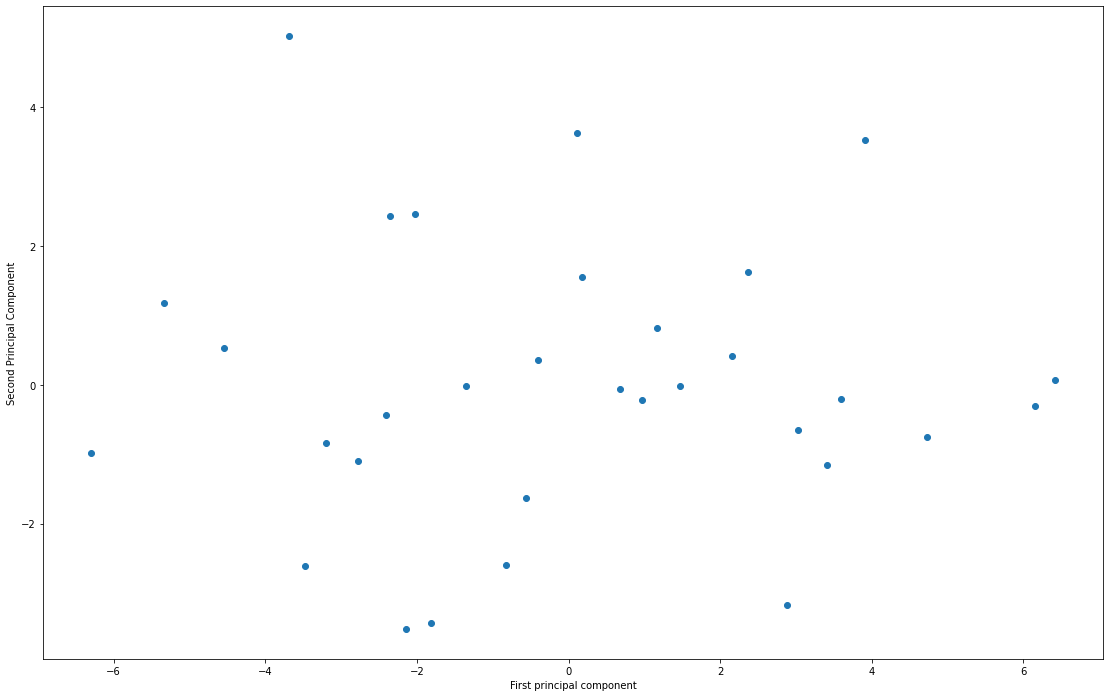

In [122]:
plt.figure(figsize=(19,12))
plt.scatter(principalComponents[:,0],principalComponents[:,1],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

<AxesSubplot:>

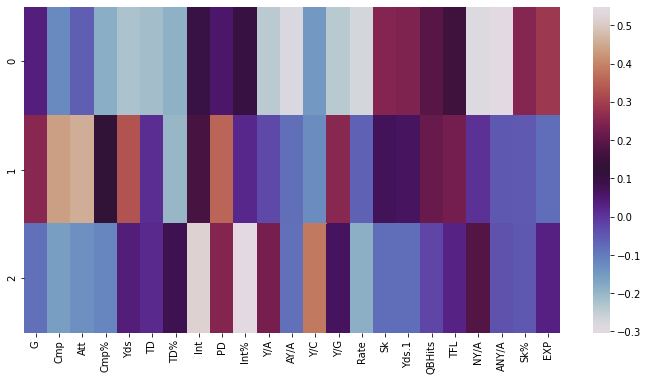

In [123]:
features_names = ['G', 'Cmp', 'Att', 'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'PD',
       'Int%', 'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Rate', 'Sk', 'Yds.1', 'QBHits',
       'TFL', 'NY/A', 'ANY/A', 'Sk%', 'EXP']

map= pd.DataFrame(pca.components_,columns=features_names)
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight')